In [2]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [3]:
#Read the training & test data
liver_df = pd.read_csv('C:/Users/DELL/Desktop/Sem2/IndianLiverPatientData.txt')

In [4]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


In [5]:
liver_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Class                         583 non-null object
dtypes: float64(5), int64(4), object(2)
memory usage: 50.2+ KB


In [5]:
#Here is the observation from the dataset:
#1)  gender and Class  non-numeric veriable. All others are numeric.
#2) There are 10 features and 1 output - dataset. Value 1 indicates that the patient has liver disease and 0 indicates the patient does not have liver disease.

In [6]:
#Describe gives statistical information about NUMERICAL columns in the dataset
liver_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,NaN
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,NaN
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,NaN
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,NaN
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,NaN
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,NaN


In [7]:
##We can see that there are missing values for Albumin_and_Globulin_Ratio as only 579 entries have valid values indicating 4 missing values.
#Gender has only 2 values - Male/Female

In [7]:
#Which features are available in the dataset?
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Class'],
      dtype='object')

In [8]:
#Check for any null values
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Class                         0
dtype: int64

In [9]:
#The only data that is null is the Albumin_and_Globulin_Ratio - Only 4 rows are null.

# Data Visualization


Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


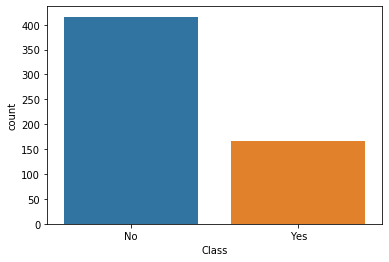

In [10]:
sns.countplot(data=liver_df, x = 'Class', label='Count')

LD, NLD = liver_df['Class'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


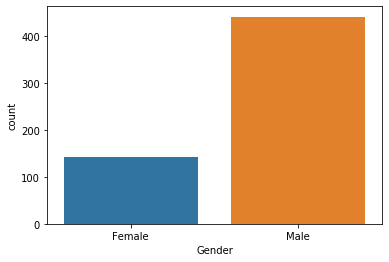

In [11]:
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [12]:
liver_df[['Gender', 'Class','Age']].groupby(['Class','Gender'], as_index=False).count().sort_values(by='Class', ascending=False)
#count

,Class,Gender,Age
2,Yes,Female,50
3,Yes,Male,117
0,No,Female,92
1,No,Male,324


In [13]:
liver_df[['Gender', 'Class','Age']].groupby(['Class','Gender'], as_index=False).mean().sort_values(by='Class', ascending=False)
#mean

,Class,Gender,Age
2,Yes,Female,42.740000
3,Yes,Male,40.598291
0,No,Female,43.347826
1,No,Male,46.950617


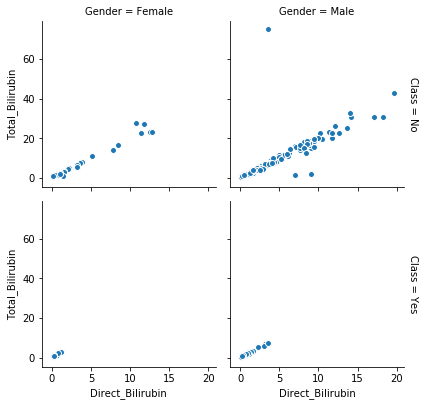

In [14]:
g = sns.FacetGrid(liver_df, col="Gender", row="Class", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. We have the possibility of removing one of this feature.

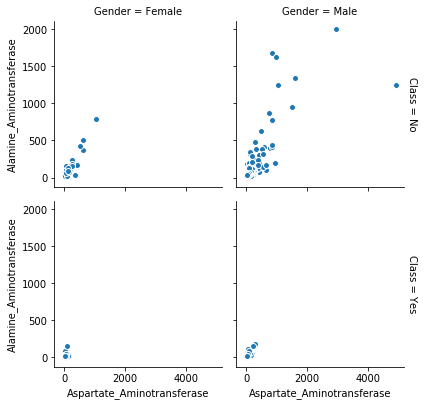

In [15]:
g = sns.FacetGrid(liver_df, col="Gender", row="Class", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. We have the possibility of removing one of this feature.

Observation 
From the above jointplots and scatterplots, we find direct relationship between the following features:
Direct_Bilirubin & Total_Bilirubin
Aspartate_Aminotransferase & Alamine_Aminotransferase
Total_Protiens & Albumin
Albumin_and_Globulin_Ratio & Albumin

Hence, we can very well find that we can omit one of the features. I'm going to keep the follwing features:
Total_Bilirubin
Alamine_Aminotransferase
Total_Protiens
Albumin_and_Globulin_Ratio
Albumin

In [16]:
liver_df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No


Convert categorical variable "Gender" to indicator variables

In [17]:
pd.get_dummies(liver_df['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [18]:
liver_df = pd.concat([liver_df,pd.get_dummies(liver_df['Gender'], prefix = 'Gender')], axis=1)

In [19]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No,0,1


In [20]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000,1.000000


In [21]:
liver_df[liver_df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,No,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,No,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,Yes,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,Yes,0,1


In [22]:
liver_df["Albumin_and_Globulin_Ratio"] = liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())

In [23]:
liver_df["Albumin_and_Globulin_Ratio"]

0      0.90
1      0.74
2      0.89
3      1.00
4      0.40
       ... 
578    0.37
579    1.10
580    1.00
581    1.00
582    1.50
Name: Albumin_and_Globulin_Ratio, Length: 583, dtype: float64

In [24]:
# The input variables/features are all the inputs except Dataset. The prediction or label is 'Dataset' that determines whether the patient has liver disease or not. 
X = liver_df.drop(['Gender','Class'], axis=1)
X.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1


In [25]:
y = liver_df['Class'] # No for liver disease; Yes for no liver disease

In [26]:
# Correlation
liver_corr = X.corr()

In [27]:
liver_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.003404,-0.003404
Gender_Female,-0.056560,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003404,1.000000,-1.000000


In [29]:
#The above correlation also indicates the following correlation
# Total_Protiens & Albumin
# Alamine_Aminotransferase & Aspartate_Aminotransferase
# Direct_Bilirubin & Total_Bilirubin
# There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

In [28]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(408, 11)
(408,)
(175, 11)
(175,)


LOGISTIC REGRESSION

In [30]:
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)

In [32]:
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

Logistic Regression Training Score: 
 73.53
Logistic Regression Test Score: 
 66.29
Coefficient: 
 [[-0.01331774 -0.02784504 -0.47763643 -0.00100416 -0.0105248  -0.00310636
  -0.21314872  0.22396581  0.6559008   0.49060451  0.24834649]]
Intercept: 
 [0.738951]
Accuracy: 
 0.6628571428571428
Confusion Matrix: 
 [[104  20]
 [ 39  12]]
Classification Report: 
               precision    recall  f1-score   support

          No       0.73      0.84      0.78       124
         Yes       0.38      0.24      0.29        51

    accuracy                           0.66       175
   macro avg       0.55      0.54      0.53       175
weighted avg       0.62      0.66      0.64       175



The model has an accuracy of 73.53%. The training and testing scores are very close to each other at 66.29% respectively.

A simple way to check the performance of a classifier is to compare its accuracy to a biased estimator. If we had a biased estimator, which, independent of all the metrics, always predicted that the patient has liver disease, for the complete dataset we would have an accuracy of 73.53%.

The training and testing accuracy percentages being so close to each other indicate that the model has high bias and is underfitting the data. To get a better fit, we should increase the number of parameters that we fit to the data or use a different model.

In [33]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
8,Albumin_and_Globulin_Ratio,0.655901
9,Gender_Female,0.490605
10,Gender_Male,0.248346
7,Albumin,0.223966
3,Alkaline_Phosphotase,-0.001004
5,Aspartate_Aminotransferase,-0.003106
4,Alamine_Aminotransferase,-0.010525
0,Age,-0.013318
1,Total_Bilirubin,-0.027845
6,Total_Protiens,-0.213149


# Gaussian Naive Bayes


In [34]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
#Predict Output
gauss_predicted = gaussian.predict(X_test)

In [36]:
gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

Gaussian Score: 
 56.13
Gaussian Test Score: 
 53.14
Accuracy: 
 0.5314285714285715
[[44 80]
 [ 2 49]]
              precision    recall  f1-score   support

          No       0.96      0.35      0.52       124
         Yes       0.38      0.96      0.54        51

    accuracy                           0.53       175
   macro avg       0.67      0.66      0.53       175
weighted avg       0.79      0.53      0.53       175



# Random Forest


In [37]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
#Predict Output
rf_predicted = random_forest.predict(X_test)

In [39]:

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 68.0
Accuracy: 
 0.68
[[100  24]
 [ 32  19]]
              precision    recall  f1-score   support

          No       0.76      0.81      0.78       124
         Yes       0.44      0.37      0.40        51

    accuracy                           0.68       175
   macro avg       0.60      0.59      0.59       175
weighted avg       0.67      0.68      0.67       175



In [40]:
#I'm considering three important features based on recursive feature elimination

finX = liver_df[['Total_Protiens','Albumin', 'Gender_Male']]
finX.head(4)


,Total_Protiens,Albumin,Gender_Male
0,6.8,3.3,0
1,7.5,3.2,1
2,7.0,3.3,1
3,6.8,3.4,1


In [43]:
X_train, X_test, y_train, y_test = train_test_split(finX, y, test_size=0.30, random_state=101)

# Decision Tree

In [44]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [45]:
#Predict Output
dt_predicted = decision_tree.predict(X_test)

In [46]:
decision_tree_score = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_tree_score_test = round(decision_tree.score(X_test, y_test) * 100, 2)
print('Decision Tree Score: \n', decision_tree_score)
print('Decision Tree Test Score: \n', decision_tree_score_test)
print('Accuracy: \n', accuracy_score(y_test,dt_predicted))
print(confusion_matrix(y_test,dt_predicted))
print(classification_report(y_test,dt_predicted))

Decision Tree Score: 
 93.38
Decision Tree Test Score: 
 62.29
Accuracy: 
 0.6228571428571429
[[95 29]
 [37 14]]
              precision    recall  f1-score   support

          No       0.72      0.77      0.74       124
         Yes       0.33      0.27      0.30        51

    accuracy                           0.62       175
   macro avg       0.52      0.52      0.52       175
weighted avg       0.60      0.62      0.61       175



# Support Vector Machine (SVM)

In [47]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scale', StandardScaler()),    
    ('pca', PCA(n_components=3)),
    ('svc', SVC()),
])
pipe.fit(X_train, y_train)



Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=3,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [48]:
#Predict Output
sv_predicted = pipe.predict(X_test)

In [49]:
svc_score = round(pipe.score(X_train, y_train) * 100, 2)
svc_score_test = round(pipe.score(X_test, y_test) * 100, 2)
#svcScore, svcScore_test = processResults(pipe)


In [50]:
print('SVM Score: \n', svc_score)
print('SVM Test Score: \n', svc_score_test)
print('Accuracy: \n', accuracy_score(y_test,dt_predicted))
print(confusion_matrix(y_test,dt_predicted))
print(classification_report(y_test,dt_predicted))

SVM Score: 
 71.57
SVM Test Score: 
 70.86
Accuracy: 
 0.6228571428571429
[[95 29]
 [37 14]]
              precision    recall  f1-score   support

          No       0.72      0.77      0.74       124
         Yes       0.33      0.27      0.30        51

    accuracy                           0.62       175
   macro avg       0.52      0.52      0.52       175
weighted avg       0.60      0.62      0.61       175



# KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

pipeknn = Pipeline([
    ('scale', StandardScaler()),    
    ('knn', KNeighborsClassifier(n_neighbors=5)),
])
pipeknn.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [52]:
#Predict Output
knn_predicted = pipe.predict(X_test)

In [53]:
knn_score = round(pipe.score(X_train, y_train) * 100, 2)
knn_score_test = round(pipe.score(X_test, y_test) * 100, 2)

In [54]:
print('KNN Score: \n', knn_score)
print('KNN Test Score: \n', knn_score_test)
print('Accuracy: \n', accuracy_score(y_test,dt_predicted))
print(confusion_matrix(y_test,dt_predicted))
print(classification_report(y_test,dt_predicted))

KNN Score: 
 71.57
KNN Test Score: 
 70.86
Accuracy: 
 0.6228571428571429
[[95 29]
 [37 14]]
              precision    recall  f1-score   support

          No       0.72      0.77      0.74       124
         Yes       0.33      0.27      0.30        51

    accuracy                           0.62       175
   macro avg       0.52      0.52      0.52       175
weighted avg       0.60      0.62      0.61       175



In [55]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No,0,1


In [56]:
# Model Evaluation
#We can now rank our evaluation of all the models to choose the best one for our problem. 
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes', 'Random Forest','Decision Tree', 'Support Vector Classifier', 'Nearest Neighbour'],
    'Score': [ logreg_score, gauss_score, random_forest_score, decision_tree_score, svc_score, knn_score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test,decision_tree_score_test, svc_score_test, knn_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
4,Support Vector Classifier,71.57,70.86
5,Nearest Neighbour,71.57,70.86
2,Random Forest,100.00,68.00
0,Logistic Regression,73.53,66.29
3,Decision Tree,93.38,62.29
1,Gaussian Naive Bayes,56.13,53.14
